In [21]:

from keras.datasets import mnist
import numpy as np
from time import time
import numpy as np
import keras.backend as K
from keras.engine.topology import Layer, InputSpec
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import SGD
from keras import callbacks
from keras.initializers import VarianceScaling
from sklearn.cluster import KMeans
import sklearn.metrics

from sklearn.preprocessing import normalize

In [4]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [32]:
df = pd.read_excel('食材_clean_data.xls')
df

,Unnamed: 0,recipe_id,unit_g,calories_kcal,protein_g,fat_g,saturated_fat_g,carbohydrate_g,dietary_fiber_g,sugar_g,...,magnesium_mg,iron_mg,zinc_mg,phosphorus_mg,nicotinin_mg,folate_ug,alpha_carotene_ug,beta_carotene_ug,water_g,ash_g
0,0,29102,440.00,1469.450000,50.21,1.490000,0.410000,347.530000,44.30,201.030000,...,388.580000,17.140000,7.320000,1060.390000,4.440000,265.730000,0.000000,0.000000,33.290000,7.460000
1,1,29103,15.00,9.800000,0.50,0.522493,4.338903,2.250000,0.35,0.050000,...,4.150000,0.300000,0.100000,14.200000,0.050000,2.250000,0.000000,0.000000,7.300000,4.900000
2,2,29104,1702.08,95.630000,86.78,35.190000,140.550000,22.550000,85.11,275.620000,...,28.810000,11.150000,910.390000,30.560000,112.260000,116.240000,2336.540000,709.830000,77.690000,157.763499
3,3,29105,1307.00,2818.600000,38.20,267.670000,48.800000,90.550000,19.62,7.990000,...,242.860000,12.010000,5.570000,725.930000,10.270000,132.080000,367.800000,17878.710000,880.940000,29.480000
4,4,29106,136.96,0.050000,0.05,0.000000,35.350000,0.050000,35.05,1.700000,...,28.595854,0.020000,1.140000,146.870248,38.658228,217.537796,969.252820,4.550000,136.591462,0.000000
5,5,29107,112.08,9.550000,3.96,0.750000,12.580000,3.720000,5.20,16.300000,...,2.460000,0.920000,160.140000,0.890000,119.280000,0.000000,8.470000,362.460000,6.470000,6.762549
6,6,29108,370.00,427.490000,32.79,14.860000,5.100000,43.100000,1.54,15.230000,...,130.530000,7.150000,5.380000,791.830000,0.960000,144.710000,0.000000,30.450000,268.100000,11.240000
7,7,29109,600.00,1202.290000,30.70,28.140000,14.680000,212.000000,10.05,42.860000,...,76.950000,5.470000,4.440000,386.270000,2.270000,153.320000,335.268089,46.680000,325.190000,2.000000
8,8,29110,1432.30,1.800000,144.00,100.800000,42.100000,3.500000,31.50,84.000000,...,14.136217,3.970957,87.000000,0.000000,94.500000,907.810499,4032.000000,336.800000,1.800000,178.049153
9,9,29111,1250.00,1377.500000,0.00,0.000000,12.496352,360.000000,10.00,340.000000,...,70.000000,3.865645,153.782744,120.000000,64.058443,270.000000,2352.276813,11520.000000,880.000000,0.000000


# 相關係數

In [24]:
#作法1.全部找出來,看要去掉哪個
import numpy as np
np.corrcoef([df["unit_g"],df["calories_kcal"],df["protein_g"],df["fat_g"]])

array([[1.        , 0.27117827, 0.71715141, 0.37362392],
       [0.27117827, 1.        , 0.41055533, 0.76122802],
       [0.71715141, 0.41055533, 1.        , 0.52012257],
       [0.37362392, 0.76122802, 0.52012257, 1.        ]])

In [45]:
#做法2.VIF 一般認為去除10以上的即可
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy as sp
cc = sp.corrcoef(df, rowvar=False)
VIF = np.linalg.inv(cc)
VIF.diagonal()
#但若去除太多怕不好解釋  看你們

array([1.90116298e+03, 1.90127167e+03, 2.92781028e+02, 4.99500761e+01,
       1.20471556e+01, 1.75258439e+01, 1.03800971e+01, 1.39766188e+01,
       2.22403519e+00, 1.69570031e+00, 1.29267579e+02, 2.73547754e+02,
       1.78547978e+00, 1.63293947e+00, 1.79552674e+00, 1.28939166e+00,
       2.06312233e+00, 7.01887109e+00, 1.18993018e+01, 2.56660169e+00,
       5.27170395e+00, 2.98231566e+00, 1.94912328e+01, 6.95102088e+00,
       2.01278338e+00, 1.65556760e+01, 1.01697497e+02, 2.56163057e+02,
       7.33489777e+01, 1.88804546e+02])

# GO


In [47]:
data = pd.read_excel('食材_clean_data.xls')
data.head()

,Unnamed: 0,recipe_id,unit_g,calories_kcal,protein_g,fat_g,saturated_fat_g,carbohydrate_g,dietary_fiber_g,sugar_g,...,magnesium_mg,iron_mg,zinc_mg,phosphorus_mg,nicotinin_mg,folate_ug,alpha_carotene_ug,beta_carotene_ug,water_g,ash_g
0,0,29102,440.00,1469.45,50.21,1.490000,0.410000,347.53,44.30,201.03,...,388.580000,17.14,7.32,1060.390000,4.440000,265.730000,0.00000,0.00,33.290000,7.460000
1,1,29103,15.00,9.80,0.50,0.522493,4.338903,2.25,0.35,0.05,...,4.150000,0.30,0.10,14.200000,0.050000,2.250000,0.00000,0.00,7.300000,4.900000
2,2,29104,1702.08,95.63,86.78,35.190000,140.550000,22.55,85.11,275.62,...,28.810000,11.15,910.39,30.560000,112.260000,116.240000,2336.54000,709.83,77.690000,157.763499
3,3,29105,1307.00,2818.60,38.20,267.670000,48.800000,90.55,19.62,7.99,...,242.860000,12.01,5.57,725.930000,10.270000,132.080000,367.80000,17878.71,880.940000,29.480000
4,4,29106,136.96,0.05,0.05,0.000000,35.350000,0.05,35.05,1.70,...,28.595854,0.02,1.14,146.870248,38.658228,217.537796,969.25282,4.55,136.591462,0.000000


In [48]:
#正規化
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

#標準化 
mean = data.mean(axis=0)
std = data.std(axis=0)
data-=mean
data/=std
#正規化或標準化擇一即可,但呈現上因標準化有負值,因此採用正規化
data

,Unnamed: 0,recipe_id,unit_g,calories_kcal,protein_g,fat_g,saturated_fat_g,carbohydrate_g,dietary_fiber_g,sugar_g,...,magnesium_mg,iron_mg,zinc_mg,phosphorus_mg,nicotinin_mg,folate_ug,alpha_carotene_ug,beta_carotene_ug,water_g,ash_g
0,-1.731629,-1.717949,-0.283312,1.210051,0.219385,-0.412663,-0.484033,2.714569,0.475904,1.435758,...,2.545038,1.171315,-0.432893,1.160105,-0.369414,0.037903,-0.237872,-0.160480,-0.439511,-0.379354
1,-1.731066,-1.717401,-0.783510,-0.532664,-0.601013,-0.429735,-0.446279,-0.489548,-0.364897,-0.401380,...,-0.556792,-0.651244,-0.444891,-0.470205,-0.396313,-0.239674,-0.237872,-0.160480,-0.502071,-0.408911
2,-1.730503,-1.716853,1.202075,-0.430189,0.822925,0.181980,0.862612,-0.301168,1.256634,2.117578,...,-0.357819,0.523029,1.067830,-0.444710,0.291234,-0.119585,0.203453,-0.080358,-0.332635,1.356004
3,-1.729940,-1.716305,0.737091,2.820837,0.021175,4.284139,-0.019040,0.329856,0.003755,-0.328802,...,1.369274,0.616105,-0.435801,0.638906,-0.333692,-0.102898,-0.168402,1.857566,1.600867,-0.125118
4,-1.729377,-1.715756,-0.639971,-0.544305,-0.608440,-0.438955,-0.148285,-0.509963,0.298944,-0.386298,...,-0.359547,-0.681548,-0.443163,-0.263460,-0.159748,-0.012868,-0.054800,-0.159966,-0.190854,-0.465485
5,-1.728814,-1.715208,-0.669253,-0.532962,-0.543911,-0.425721,-0.367088,-0.475906,-0.272112,-0.252841,...,-0.570428,-0.584142,-0.178936,-0.490946,0.334248,-0.242045,-0.236272,-0.119567,-0.504069,-0.387406
6,-1.728252,-1.714660,-0.365698,-0.033973,-0.068109,-0.176747,-0.438966,-0.110469,-0.342131,-0.262622,...,0.462923,0.090118,-0.436117,0.741600,-0.390737,-0.089592,-0.237872,-0.157043,0.125700,-0.335711
7,-1.727689,-1.714111,-0.095003,0.891082,-0.102602,0.057582,-0.346909,1.456883,-0.179328,-0.010058,...,0.030605,-0.091705,-0.437679,0.109603,-0.382710,-0.080522,-0.174547,-0.155211,0.263122,-0.442393
8,-1.727126,-1.713563,0.884562,-0.542215,1.767265,1.339683,-0.083422,-0.477948,0.231029,0.365998,...,-0.476217,-0.253944,-0.300480,-0.492333,0.182413,0.714337,0.523691,-0.122464,-0.515310,1.590216
9,-1.726563,-1.713015,0.670006,1.100269,-0.609265,-0.438955,-0.367892,2.830288,-0.180284,2.706070,...,-0.025472,-0.265341,-0.189501,-0.305333,-0.004113,0.042401,0.206426,1.139831,1.598604,-0.465485


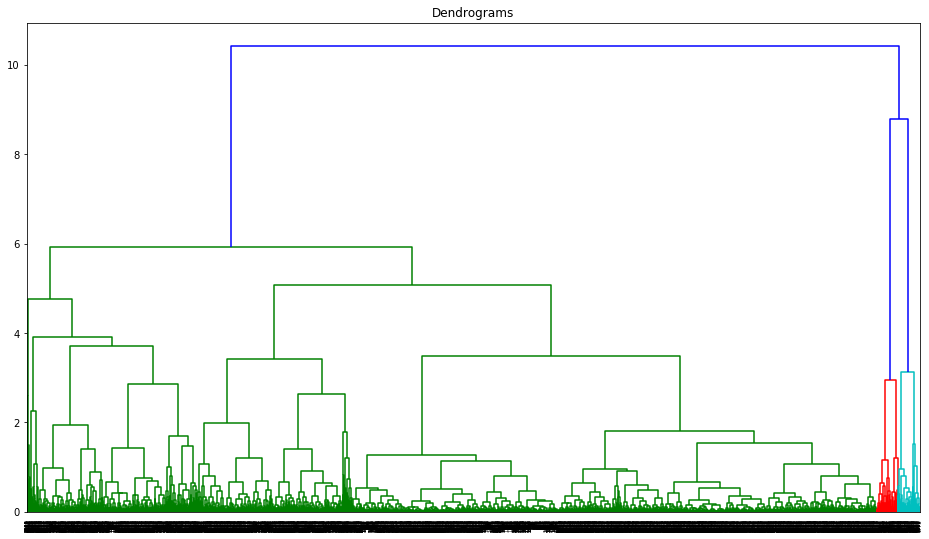

In [63]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(16, 9))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
#這邊可以看到分布很不平均

In [106]:
要分幾群呢 = 15
#n_clusters可以輸入你要分幾群
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=要分幾群呢, affinity='euclidean', linkage='ward')  
result = cluster.fit_predict(data_scaled)
[print("第",i,"群數量為:",len(np.where(result==i)[0])) for i in range(要分幾群呢)]
#7.8群特多,改變分幾群也一樣,猜測是供線性問題

第 0 群數量為: 55
第 1 群數量為: 529
第 2 群數量為: 65
第 3 群數量為: 446
第 4 群數量為: 216
第 5 群數量為: 48
第 6 群數量為: 19
第 7 群數量為: 2197
第 8 群數量為: 1420
第 9 群數量為: 50
第 10 群數量為: 101
第 11 群數量為: 94
第 12 群數量為: 434
第 13 群數量為: 475
第 14 群數量為: 5


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

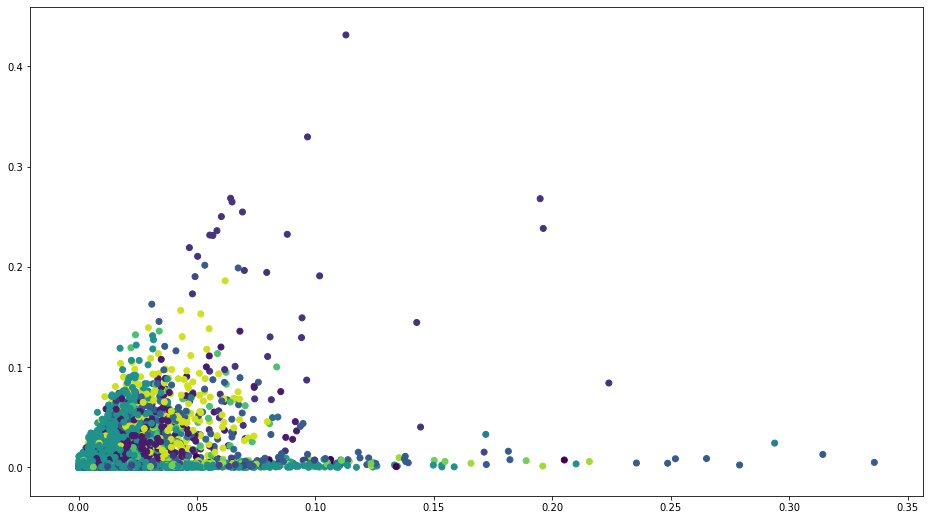

In [107]:
plt.figure(figsize=(16, 9))  
plt.scatter(data_scaled['unit_g'], data_scaled['calories_kcal'], c=cluster.labels_) 